In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import activations

from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow import keras
import tensorflow as tf
from sklearn.datasets import make_moons

from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Tensor Flow for Classification

Data used `Fashion`

In [2]:
# Load files

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print('The dimention of features ({1}, {2}) by each {0} rows'.format(*X_train_full.shape))
print("dtype",X_train_full.dtype)

The dimention of features (28, 28) by each 60000 rows
dtype uint8


* The first observation of `y_train_full` show `0`. This number represent a type of clothes.
* The first observation of `X_train_full` is a matrix `2d` of `28x28`. In this matrix was convert the image of the clothes.

In [3]:
# Create data for validation
# The first 5000 rows is for validation, while the next 55000 rows is for training
# We divide by 255 for work with scale the pixel intensities down to the 0-1 range

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

print('The dimention of features ({1}, {2}) by each {0} rows'.format(*X_train.shape))
print('The dimention of target is ({},) rows'.format(*y_train.shape))

The dimention of features (28, 28) by each 55000 rows
The dimention of target is (55000,) rows


# Perceptron
Model:

$$f(x) = \sigma(XW + b)$$
where $\sigma$ = $softmax(x)$

* $W$ is matrix of $n$ x $1$, where $n$ is the numbers of features.
* $b$ is a vector of $1$ dimenstion for the computes.
* Recall for the computation, $1$ convert in $m$, the numbers of rows. 

In [4]:
# What means each number

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print("Category 0 represent: ",class_names[y_train[0]])
print('Unique values of y_train: {}'.format(np.unique(y_train)))

Category 0 represent:  Coat
Unique values of y_train: [0 1 2 3 4 5 6 7 8 9]


In [5]:
# Creating the Model Using the Sequential API
# We only add the layer need

def create_model():
    
    model = Sequential()
    
    # Flattens the input. Does not affect the batch size.
    # Flatten layer whose role is simply to convert each input image into a 1D array
    model.add(Flatten(input_shape = [28, 28]))
    
    # kernel_initializer --> distribution of weights when init 
    # activation function --> Relu
    # 50 is the units (nodes or neurons) for the first hidden layer. This must positive integer
    
    model.add(Dense(50, activation=activations.relu, kernel_initializer = 'normal'))
    
    model.add(Dense(50, activation=activations.relu))
    
    model.add(Dense(50, activation=activations.relu))
    
    # Output layer. Units Output are 10. This must be equal number of classes
    # activation softmax is because the y = [0, 1, ...2, 9]
    model.add(Dense(10, activation=activations.softmax))

    # Compile the model
    # sparse_categorical_crossentropy -> Computes the categorical crossentropy loss where y = [0, 1, ...2, 9]
    # sgd --> Schocastic Gradiend Descend
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer ='sgd', metrics = ['accuracy'])
    
    return model

In [6]:
# Training and Evaluating the Model

model_1 = create_model()
history = model_1.fit(
    X_train, y_train, 
    epochs = 20, 
    batch_size = 100 , 
    validation_data=(X_valid, y_valid))

Epoch 1/20
550/550 [==============================] - 2s 2ms/step - loss: 1.2755 - accuracy: 0.5846 - val_loss: 0.7581 - val_accuracy: 0.7276
Epoch 2/20
550/550 [==============================] - 1s 2ms/step - loss: 0.6831 - accuracy: 0.7613 - val_loss: 0.6199 - val_accuracy: 0.7836
Epoch 3/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5791 - accuracy: 0.7999 - val_loss: 0.5415 - val_accuracy: 0.8122
Epoch 4/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5294 - accuracy: 0.8151 - val_loss: 0.4938 - val_accuracy: 0.8362
Epoch 5/20
550/550 [==============================] - 1s 2ms/step - loss: 0.4994 - accuracy: 0.8253 - val_loss: 0.4735 - val_accuracy: 0.8388
Epoch 6/20
550/550 [==============================] - 1s 2ms/step - loss: 0.4778 - accuracy: 0.8315 - val_loss: 0.4680 - val_accuracy: 0.8382
Epoch 7/20
550/550 [==============================] - 1s 2ms/step - loss: 0.4618 - accuracy: 0.8375 - val_loss: 0.4460 - val_accuracy: 0.8472
Epoch 

The `fit()` method returns a History object containing the training parameters (`history.params`), the list of epochs it went through (`history.epoch`), and most importantly a dictionary (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set

* If the data is not balanced we can pass `class_weight` 

    ``` python
    from sklearn.utils import class_weight
    class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
    model.fit(X_train, y_train, class_weight=class_weights)

    ```

In [7]:
# The summary ends with the total number of parameters, including trainable and non-trainable parameters
# 39250 is the result of 784*50, multiply the input bu the amount of nothes in the first hidden layer
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 44,860
Trainable params: 44,860
Non-trainable params: 0
_________________________________________________________________


In [8]:
for layer in model_1.layers:
    if len(layer.get_weights()) !=0:        
        weights, biases = layer.get_weights()
        print(weights.shape, biases.shape)

(784, 50) (50,)
(50, 50) (50,)
(50, 50) (50,)
(50, 10) (10,)


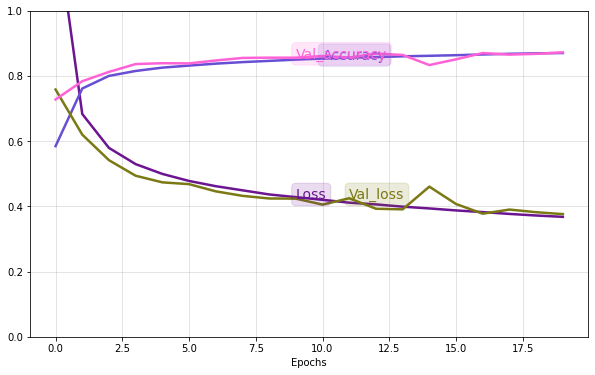

In [9]:
history_data = pd.DataFrame(history.history)

columns = history_data.columns
random_abs = np.abs(np.random.randn(len(columns), 3))
colors = np.abs(random_abs)/random_abs.max()

ys = history_data.median()
xs = history_data.agg(lambda x:np.argsort(x)[len(x)//2])

fig, ax = plt.subplots(figsize=(10, 6))

for (x, y, column, color) in zip(xs, ys, columns, colors):
    color = tuple(color)
    ax.plot(history_data[column], color = color, lw = 2.5)
    
    ax.text(x, y, column.capitalize(), fontsize = 14, color=color,  bbox=dict(boxstyle="round",
                   ec= color + (0.15,),
                   fc= color + (0.15,),
                   ))

ax.set_ylim(0, 1)
ax.set_xlabel('Epochs')
ax.grid(True, color = (0.1, 0.1, 0.1), alpha = 0.15)
plt.show()

In [10]:
# to evaluate the model
model_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 98.8457 - accuracy: 0.7819


[98.84574127197266, 0.7818999886512756]

In [11]:
# To predict on new records
X_new = X_test[:5].copy()
y_proba = model_1.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 96ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [12]:
# To identify the class that each new record belong
# get the index of the class with the greatest probability for each record
y_pred = np.argmax(y_proba, axis=1)
print(np.array(class_names)[y_pred])

['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt']


In [13]:
def create_model():
    
    model = Sequential()
    
    # Flattens the input. Does not affect the batch size.
    model.add(Flatten(input_shape = [28, 28]))
    
    # kernel_initializer --> distribution of weights when init 
    # activation function
    # 50 is the units output. Positive integer, dimensionality of the output space (next layer)
    model.add(Dense(50, activation=activations.relu, kernel_initializer = 'normal'))
    
    model.add(Dense(50, activation=activations.relu))
    
    model.add(Dense(50, activation=activations.relu))
    
    # Output layer. Units Output are 10. This must be equal to y.shape
    # activation sigmoid is because the y is 0-1 values
    model.add(Dense(10, activation=activations.sigmoid))

    # binary_crossentropy -> Computes the binary crossentropy loss where y = [[0, 0,.., 1], ... [0, 1,...0]]
    # sgd --> Schocastic Gradiend Descend
    model.compile(loss = 'binary_crossentropy', optimizer ='sgd', metrics = ['accuracy'])
    
    return model

In [14]:
# We transfor y = [0, 1, 0, 1, ..., 9] --> y = [[0, 0,.., 1], ... [0, 1,...0]]
y_train_trans = tf.one_hot(y_train, 10).numpy() # 10  es number of classes

model_1 = create_model()
history = model_1.fit(X_train, y_train_trans, epochs = 20, batch_size = 10 )

Epoch 1/20
5500/5500 [==============================] - 9s 2ms/step - loss: 0.2036 - accuracy: 0.6121
Epoch 2/20
5500/5500 [==============================] - 8s 1ms/step - loss: 0.1189 - accuracy: 0.7648
Epoch 3/20
5500/5500 [==============================] - 8s 1ms/step - loss: 0.1012 - accuracy: 0.8038
Epoch 4/20
5500/5500 [==============================] - 8s 1ms/step - loss: 0.0925 - accuracy: 0.8207
Epoch 5/20
5500/5500 [==============================] - 8s 2ms/step - loss: 0.0872 - accuracy: 0.8303
Epoch 6/20
5500/5500 [==============================] - 9s 2ms/step - loss: 0.0834 - accuracy: 0.8370
Epoch 7/20
5500/5500 [==============================] - 9s 2ms/step - loss: 0.0804 - accuracy: 0.8419
Epoch 8/20
5500/5500 [==============================] - 8s 1ms/step - loss: 0.0781 - accuracy: 0.8477
Epoch 9/20
5500/5500 [==============================] - 9s 2ms/step - loss: 0.0760 - accuracy: 0.8514
Epoch 10/20
5500/5500 [==============================] - 8s 1ms/step - loss: 0.074

In [59]:
y_test_trans = tf.one_hot(y_test, 10).numpy()
model_1.evaluate(X_test, y_test_trans)

313/313 [==============================] - 1s 1ms/step - loss: 10.6170 - accuracy: 0.8391


[10.617030143737793, 0.8391000032424927]

In [60]:
X_new = X_test[:5]
y_proba = model_1.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 64ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [61]:
predict_x=model_1.predict(X_new) 
y_pred=np.argmax(predict_x,axis=1)
print(np.array(class_names)[y_pred])

1/1 [==============================] - 0s 19ms/step
['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt']


## Building a Regression MLP Using the Sequential API

Data for practice the regression MLP come from `fetch_california_housing()`

In [66]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
from tensorflow import keras

In [68]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split( X_train_full, y_train_full)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [81]:
def create_model():
    
    model = Sequential()
    
    # Flattens the input. Does not affect the batch size.
    # model.add(Flatten(input_shape = (8,)))
    
    # kernel_initializer --> distribution of weights when init 
    # activation function
    # 50 is the units output. Positive integer, dimensionality of the output space (next layer)
    model.add(Dense(50, activation=activations.relu, kernel_initializer = 'normal', input_shape = (8,)))
    
    model.add(Dense(50, activation=activations.relu))
    
    model.add(Dense(50, activation=activations.relu))
    
    model.add(Dense(1, activation=activations.relu))

    # binary_crossentropy -> Computes the binary crossentropy loss where y = [[0, 0,.., 1], ... [0, 1,...0]]
    # sgd --> Schocastic Gradiend Descend
    model.compile(loss = 'mean_squared_error', optimizer ='sgd')
    
    return model

In [83]:
# To train the model
model_1 = create_model()
history = model_1.fit(
    X_train_scaled, y_train, 
    epochs = 20, 
    batch_size = 10 , 
    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1161/1161 [==============================] - 2s 2ms/step - loss: 0.5321 - val_loss: 0.4331
Epoch 2/20
1161/1161 [==============================] - 2s 2ms/step - loss: 0.3764 - val_loss: 0.3813
Epoch 3/20
1161/1161 [==============================] - 2s 2ms/step - loss: 0.3525 - val_loss: 0.4291
Epoch 4/20
1161/1161 [==============================] - 2s 1ms/step - loss: 0.3420 - val_loss: 0.3779
Epoch 5/20
1161/1161 [==============================] - 2s 1ms/step - loss: 0.3318 - val_loss: 0.3472
Epoch 6/20
1161/1161 [==============================] - 1s 1ms/step - loss: 0.3195 - val_loss: 0.3637
Epoch 7/20
1161/1161 [==============================] - 1s 1ms/step - loss: 0.3089 - val_loss: 0.4766
Epoch 8/20
1161/1161 [==============================] - 2s 2ms/step - loss: 0.3062 - val_loss: 0.3225
Epoch 9/20
1161/1161 [==============================] - 2s 1ms/step - loss: 0.2997 - val_loss: 0.3169
Epoch 10/20
1161/1161 [==============================] - 1s 1ms/step - loss: 0.295

In [85]:
# to evaluate the model
model_1.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.2960


0.29602962732315063

In [87]:
# to make predictions
X_new = X_test_scaled[:5].copy()
model_1.predict(X_new)

1/1 [==============================] - 0s 19ms/step


array([[1.1643705],
       [1.8612044],
       [1.2025121],
       [3.9023933],
       [1.8284688]], dtype=float32)

## Building Complex Models Using the Functional API

* A non-sequential neural network is a Wide & Deep neural network (by Heng-Tze Cheng et al)
* It connects all or part of the inputs directly to the output layer.
* This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path)


<img src = "https://1.bp.blogspot.com/-Dw1mB9am1l8/V3MgtOzp3uI/AAAAAAAABGs/mP-3nZQCjWwdk6qCa5WraSpK8A7rSPj3ACLcB/s1600/image04.png">

In [88]:
input_layer = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_layer)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_layer, hidden2]) # Here we join (concat) both wide and deep model
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(
    inputs=[input_layer], # Here we pass all inputs used
    outputs=[output])     # Here we pass the neural network

<center>
<img src = "wide_deep_neural_network.png">
</center>

In [91]:
model.compile(loss = 'mean_squared_error', optimizer='sgd')
model.fit(X_train_scaled, y_train, epochs=30, batch_size=50)

Epoch 1/30
233/233 [==============================] - 1s 1ms/step - loss: 0.5039
Epoch 2/30
233/233 [==============================] - 0s 1ms/step - loss: 0.4115
Epoch 3/30
233/233 [==============================] - 0s 1ms/step - loss: 0.3893
Epoch 4/30
233/233 [==============================] - 0s 1ms/step - loss: 0.3737
Epoch 5/30
233/233 [==============================] - 0s 1ms/step - loss: 0.3670
Epoch 6/30
233/233 [==============================] - 0s 1ms/step - loss: 0.3630
Epoch 7/30
233/233 [==============================] - 0s 1ms/step - loss: 0.3507
Epoch 8/30
233/233 [==============================] - 0s 1ms/step - loss: 0.3481
Epoch 9/30
233/233 [==============================] - 0s 1ms/step - loss: 0.3462
Epoch 10/30
233/233 [==============================] - 0s 1ms/step - loss: 0.3380
Epoch 11/30
233/233 [==============================] - 0s 1ms/step - loss: 0.3392
Epoch 12/30
233/233 [==============================] - 0s 1ms/step - loss: 0.3420
Epoch 13/30
233/233 [====

But what if you want to send a subset of the features through the wide path, and a different subset (possibly overlapping) through the deep path?

In [97]:
input_A = keras.layers.Input(shape=[5]) # subset of features for wide
input_B = keras.layers.Input(shape=[6]) # subset of features for deep 
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2]) # join
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

<center>
<img src = "wide_deep_neural_network_01.png">
</center>

In [99]:
model.compile(loss="mean_squared_error", optimizer="sgd")

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

history = model.fit(
    (X_train_A, X_train_B), 
    y_train, epochs=20,
    validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)

X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 1s 2